In [1]:
import sys
import numpy
import warnings
from sklearn.decomposition import FastICA
warnings.filterwarnings("ignore")
sys.path.append("../")
from lib.metadata import MetadataListTusz
from lib.signals import EegProcessorTusz
from lib.spectral import FourierAnalysis
from lib.filters import FilterBank
from lib.stats import StatisticalTests
from lib.bss import IWasobi, EogDenoiser, CanonicalCorrelation, EmgDenoiser
from lib.visuals import plot_eeg_windows, plot_eeg_spectrum

/var/tmp/venv-project-1/lib/python3.11/site-packages/numpy/_core/getlimits.py:548: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


### * Scales the EEG signal
### * Select a subset of the channels

{
    "cpsz": 279,
    "fnsz": 1549,
    "gnsz": 444,
    "tcsz": 30,
    "absz": 50,
    "mysz": 2,
    "tnsz": 18,
    "spsz": 49
}
{'full_file': '/mnt/c/Users/tobit/Downloads/eeg_datasets/tusz/edf/train/aaaaaenl/s001_2006/02_tcp_le/aaaaaenl_s001_t001.edf', 'seizures': [(0.0, 0.0, 'bckg'), [112.012, 128.46, 'absz']]}
Extracting EDF parameters from /mnt/c/Users/tobit/Downloads/eeg_datasets/tusz/edf/train/aaaaaenl/s001_2006/02_tcp_le/aaaaaenl_s001_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
2025-03-28 23:18:49,845 - root - INFO - Recording contains channels = ['EEG FP1-LE', 'EEG FP2-LE', 'EEG F3-LE', 'EEG F4-LE', 'EEG C3-LE', 'EEG C4-LE', 'EEG A1-LE', 'EEG A2-LE', 'EEG P3-LE', 'EEG P4-LE', 'EEG O1-LE', 'EEG O2-LE', 'EEG F7-LE', 'EEG F8-LE', 'EEG T3-LE', 'EEG T4-LE', 'EEG T5-LE', 'EEG T6-LE', 'EEG FZ-LE', 'EEG CZ-LE', 'EEG PZ-LE', 'EEG OZ-LE', 'EEG PG1-LE', 'EEG PG2-LE', 'EEG EKG-LE', 'EEG 26-LE', 'EEG 27-LE', 'EEG 28-LE', 'EEG 29-LE', 

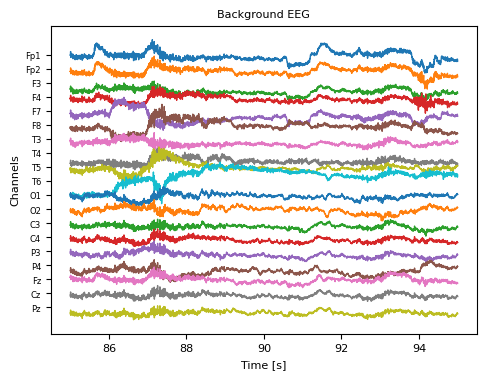

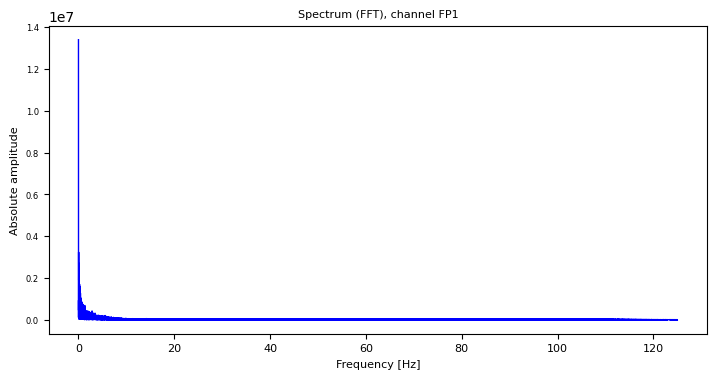

In [2]:
PATIENT = "aaaaaenl"
FILENAME = "aaaaaenl_s001_t001"
PERIOD = [85, 95]

###########################################################
metadata = MetadataListTusz()
metadata.summarize()
current_metadata = metadata.get(PATIENT, FILENAME)
print(current_metadata)
###########################################################
processor = EegProcessorTusz(current_metadata["full_file"])
processor.scale()
processor.select_channels()

###########################################################
fourier = FourierAnalysis(processor.sampling_frequency)
frequency_range, spectral_components = fourier.run_fast_fourier_transform(processor._data)

###########################################################
plot_eeg_windows(processor._data, current_metadata, processor.selected_channels, processor.sampling_frequency, PERIOD)

###########################################################
plot_eeg_spectrum(frequency_range, spectral_components, processor.selected_channels, "FP1")

In [3]:
print(processor._data.shape)
print(processor.sampling_frequency)
print(current_metadata)

(19, 367750)
250.0
{'full_file': '/mnt/c/Users/tobit/Downloads/eeg_datasets/tusz/edf/train/aaaaaenl/s001_2006/02_tcp_le/aaaaaenl_s001_t001.edf', 'seizures': [(0.0, 0.0, 'bckg'), [112.012, 128.46, 'absz']]}


### * Re-referencing to average reference

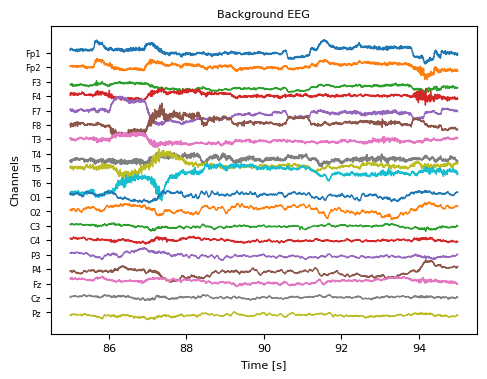

In [4]:
###########################################################
processor.rereference_to_average()

###########################################################
plot_eeg_windows(processor._data, current_metadata, processor.selected_channels, processor.sampling_frequency, PERIOD)

### * Resample the EEG to 256Hz

2025-03-28 23:18:53,617 - root - INFO - Selected frequency is = 250
2025-03-28 23:18:53,620 - root - INFO - Dowsampling factor is = 1


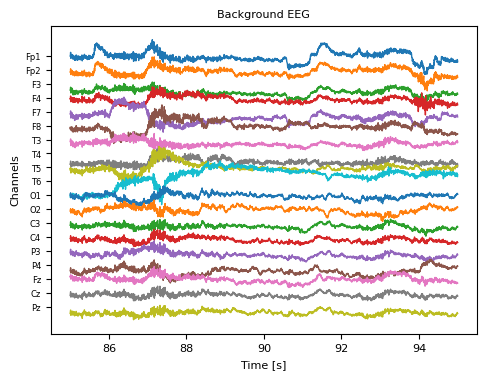

In [4]:
###########################################################
processor.resample()

###########################################################
fourier = FourierAnalysis(processor.sampling_frequency)

###########################################################
plot_eeg_windows(processor._data, current_metadata, processor.selected_channels, processor.sampling_frequency, PERIOD)


### * Remove the drift noise, high frequency oscillations, power line noise

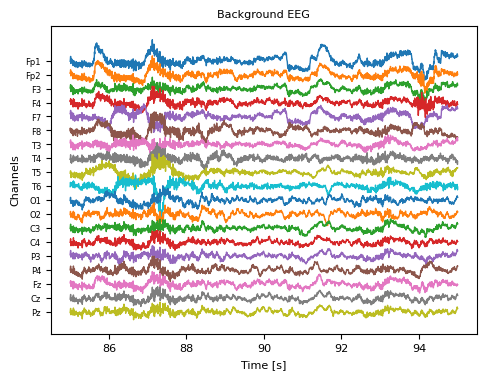

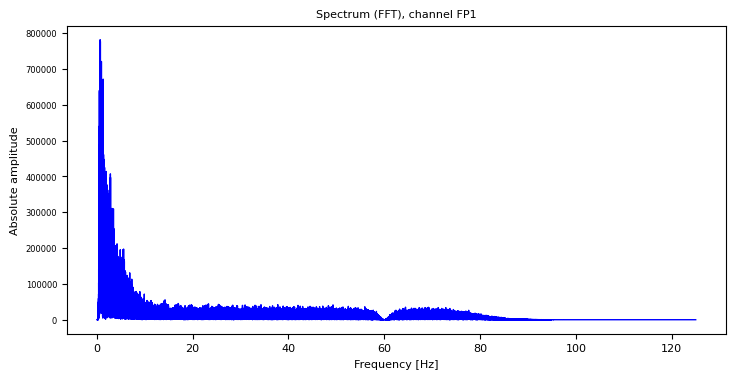

In [5]:
###########################################################
processor.filter_bank = FilterBank(0)
processor.remove_drift()
processor.remove_hfo()
processor.remove_power_noise()

###########################################################
fourier = FourierAnalysis(processor.sampling_frequency)
frequency_range, spectral_components = fourier.run_fast_fourier_transform(processor._data)

###########################################################
plot_eeg_windows(processor._data, current_metadata, processor.selected_channels, processor.sampling_frequency, PERIOD)

###########################################################
plot_eeg_spectrum(frequency_range, spectral_components, processor.selected_channels, "FP1")

### * Separated sources using iWASOBI

2025-03-28 23:23:02,387 - root - INFO - Number of sources to be removed = 2, indices: [4 3]
Source = 1, fd = 4.169861753991048
Source = 2, fd = 4.302887034645622
Source = 3, fd = 4.494088024368807
Source = 4, fd = 4.5419315575401775
Source = 5, fd = 4.7213623255281805
Source = 6, fd = 4.755578526365006
Source = 7, fd = 4.853444319676656
Source = 8, fd = 4.864443561689287
Source = 9, fd = 4.954620495322484
Source = 10, fd = 5.5431149841477865
Source = 11, fd = 5.619590642692761
Source = 12, fd = 5.679258563677715
Source = 13, fd = 5.8235467333318525
Source = 14, fd = 5.959627757353907
Source = 15, fd = 6.009955431720844
Source = 16, fd = 6.1247837190107814
Source = 17, fd = 6.276636409398154
Source = 18, fd = 6.283560824690207
Source = 19, fd = 6.328593967501775
Done!


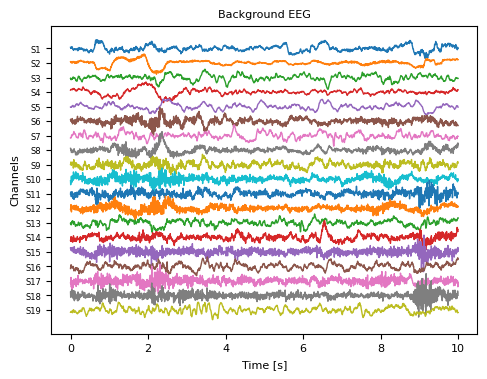

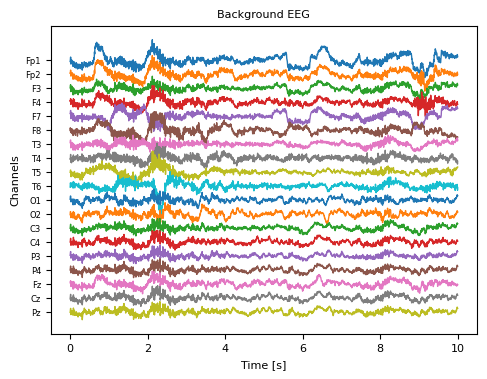

In [11]:
eog_denoiser = EogDenoiser(processor.sampling_frequency)
eeg_sources, clean_eog_eeg = eog_denoiser.apply_by_segments(processor._data[:, PERIOD[0]*processor.sampling_frequency:
                                                            PERIOD[1]*processor.sampling_frequency])
print(eog_denoiser)

###########################################################
plot_eeg_windows(eeg_sources, current_metadata, [f"S{idx}" for idx in range(1, eeg_sources.shape[0] + 1)],
                 processor.sampling_frequency, period=[0, 10])

###########################################################
plot_eeg_windows(clean_eog_eeg, current_metadata, processor.selected_channels,
                 processor.sampling_frequency, period=[0, 10])

### * Separated sources using fastica

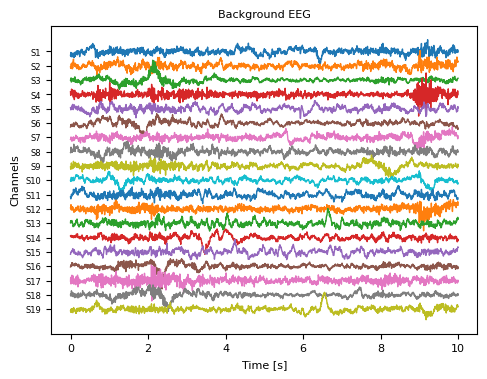

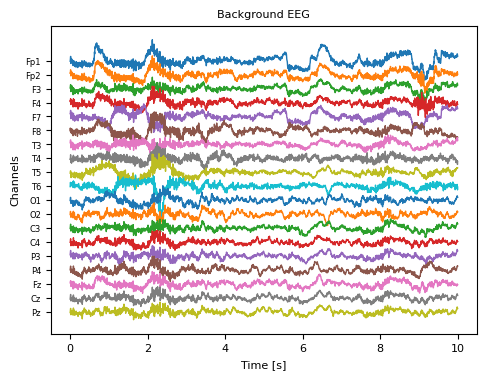

In [9]:
fastica = FastICA()
eeg_sources = fastica.fit_transform(numpy.transpose(processor._data[:, PERIOD[0]*processor.sampling_frequency:
                                                                       PERIOD[1]*processor.sampling_frequency]))

###########################################################
plot_eeg_windows(numpy.transpose(eeg_sources), current_metadata, [f"S{idx}" for idx in range(1, eeg_sources.shape[1] + 1)],
                 processor.sampling_frequency, period=[0, 10])

###########################################################
#eeg_sources[16, :] = 0
clean_eeg = fastica.inverse_transform(eeg_sources)
plot_eeg_windows(numpy.transpose(clean_eeg), current_metadata, processor.selected_channels,
                 processor.sampling_frequency, period=[0, 10])

### * Compute sources using BSS Canonical Correlation Analysis

2025-03-28 23:25:11,958 - root - INFO - Number of sources to be removed = 0
Source = 1, fd = 22.069397975488496
Source = 2, fd = 23.280998942118075
Source = 3, fd = 24.253082562482227
Source = 4, fd = 31.81131760885145
Source = 5, fd = 40.29446152239751
Source = 6, fd = 46.63396237404705
Source = 7, fd = 47.98696301343784
Source = 8, fd = 49.71756293418342
Source = 9, fd = 54.30164168848825
Source = 10, fd = 67.52055412097921
Source = 11, fd = 73.91481255079685
Source = 12, fd = 77.35178099434044
Source = 13, fd = 90.39127568810298
Source = 14, fd = 93.18196444071832
Source = 15, fd = 97.15272278026528
Source = 16, fd = 114.15970043932457
Source = 17, fd = 142.50953627201935
Source = 18, fd = 153.07530800637625
Source = 19, fd = 174.2084272358688
Done!


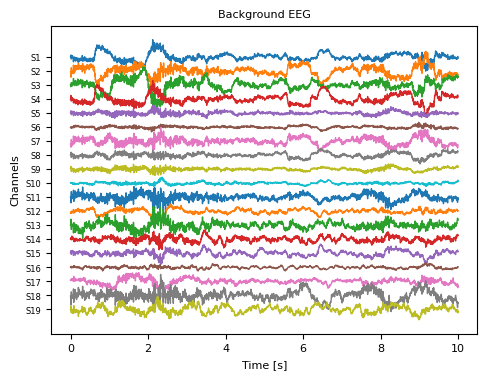

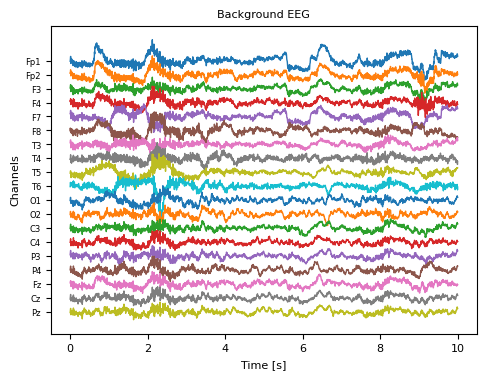

In [12]:
emg_denoiser = EmgDenoiser(processor.sampling_frequency)
eeg_sources, clean_emg_eeg = emg_denoiser.apply_by_segments(processor._data[:, PERIOD[0]*processor.sampling_frequency:
                                                            PERIOD[1]*processor.sampling_frequency])
print(emg_denoiser)

###########################################################
plot_eeg_windows(eeg_sources, current_metadata, [f"S{idx}" for idx in range(1, eeg_sources.shape[0] + 1)],
                 processor.sampling_frequency, period=[0, 10])

###########################################################
clean_eeg = bsscca.inverse_transform(eeg_sources)
plot_eeg_windows(clean_eeg, current_metadata, processor.selected_channels,
                 processor.sampling_frequency, period=[0, 10])

### * Stationarity tests (KPPS and ADF)

In [13]:
stats_gateway = StatisticalTests()
stats_gateway.check_stationarity(processor._data[15, :4000])

2025-03-28 23:25:21,619 - root - INFO - KPSS test, null hyphotesis was not rejected, p_value = 0.1, significance level = 0.05
2025-03-28 23:25:21,635 - root - INFO - White test, null hyphotesis was rejected, p_value = 2.1186725150991513e-72, significance level = 0.05
2025-03-28 23:25:21,637 - root - INFO - The series is trend stationary only (not strict stationarity)


/mnt/c/Users/tobit/Documents/Doctorado/Initiative1_epic1/Project/code/notebooks/../lib/stats.py:133: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  _, p_value, _, _ = stattools.kpss(time_serie, regression="c")


'Trend stationary'